In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

D:\Programs\Anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Programs\Anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Programs\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Weight Intialization

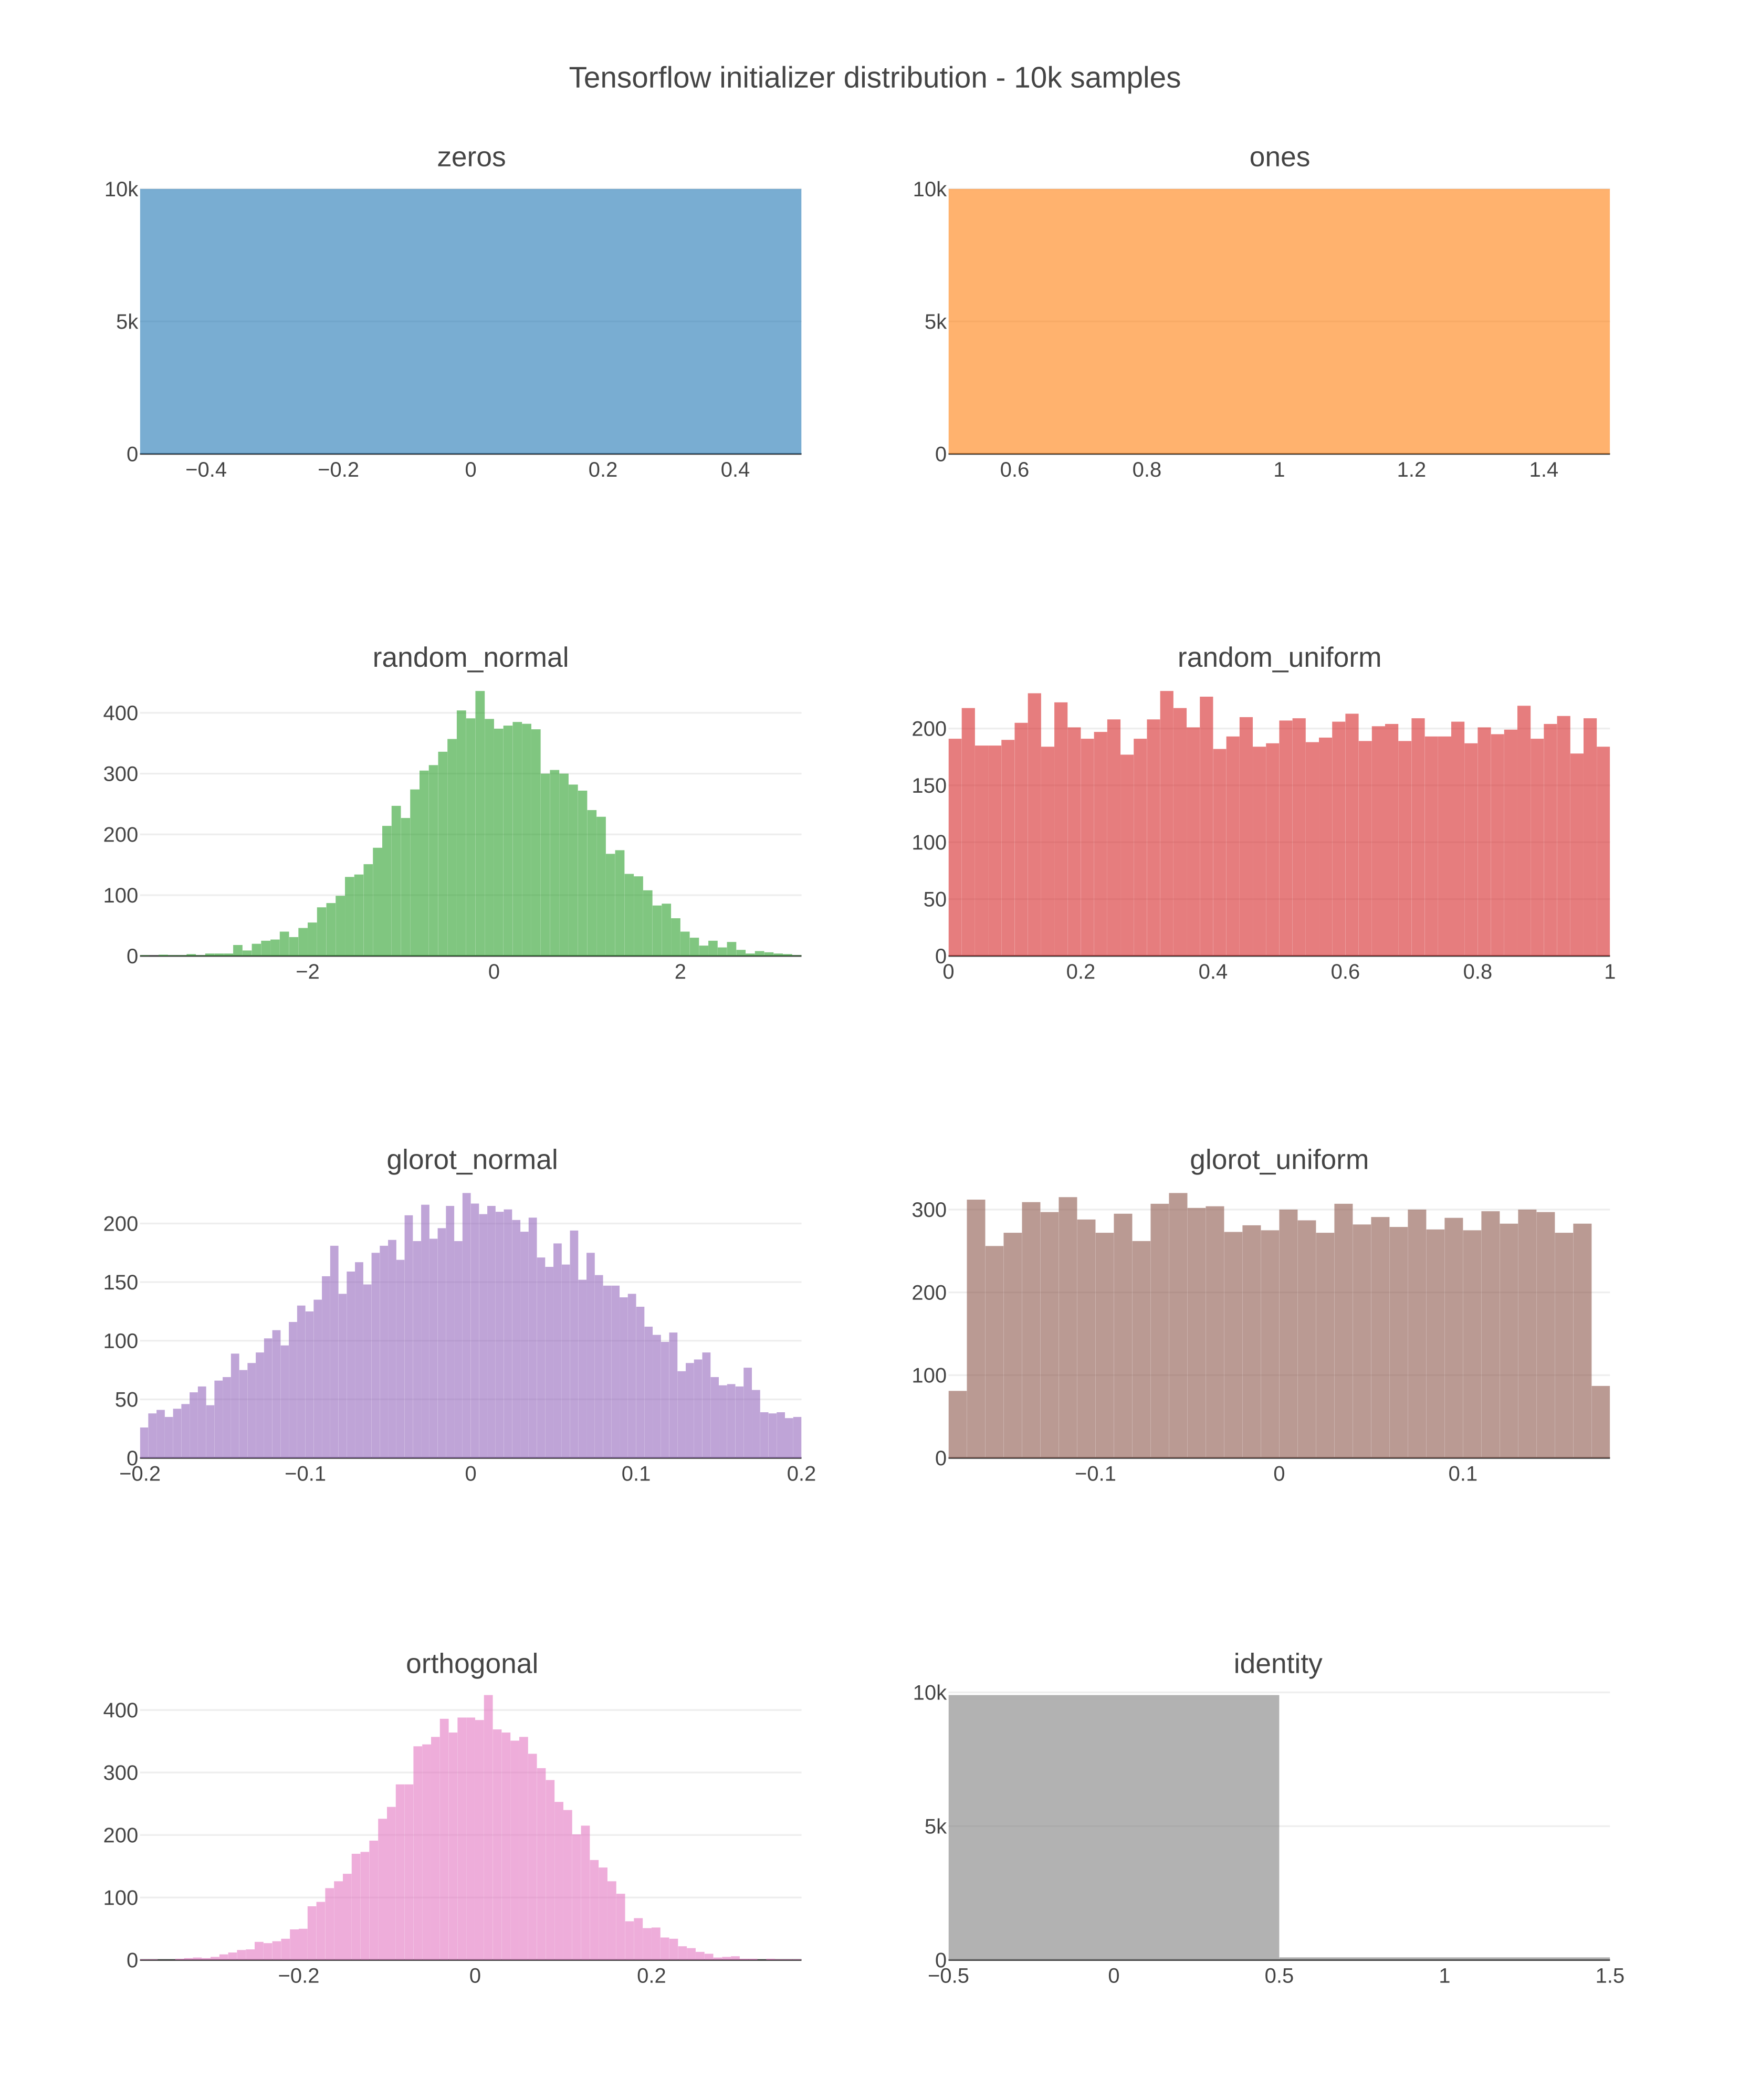

[Read more](https://keras.io/api/layers/initializers/)

### Convolutional Neural Network Architecture

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=data.shape[1:],kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

## Augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

### Training the CNN for 10 epochs using train data 

In [ ]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),steps_per_epoch=len(train_data)//bs,
                  validation_data=(test_data,test_target),validation_steps=len(test_data)//bs,epochs=10)

Epoch 1/10
206/701 [=======>......................] - ETA: 5:20 - loss: 1.1262 - accuracy: 0.5500

### Visualizing the loss and the accuracy of trained CNN

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

In [ ]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [ ]:
print(model.evaluate(test_data,test_target))

In [ ]:
predicted_target=model.predict(test_data)

In [ ]:
from sklearn.metrics import classification_report

classification_report(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1))